In [30]:
# import packages

import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [31]:
# extract data

titanic_data = pd.read_csv("C:\\To Read\\Data_sets\\titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# preprocessing

input_data = titanic_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'SibSp', 'Cabin', 'Embarked'])
output_data = titanic_data['Survived']

In [32]:


decode = LabelEncoder()
input_data['sex'] = decode.fit_transform(input_data['Sex'])



In [16]:
input_dataa = input_data.drop(columns=['Sex'])
input_dataa.isnull().sum()

Pclass      0
Age       177
Fare        0
sex         0
dtype: int64

In [17]:
input_data['Age'].fillna(0, inplace = True)

In [25]:
input_data

,Pclass,Sex,Age,Fare,sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,0.0,23.4500,0
889,1,male,26.0,30.0000,1


In [27]:
output_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: xlabel='Age'>

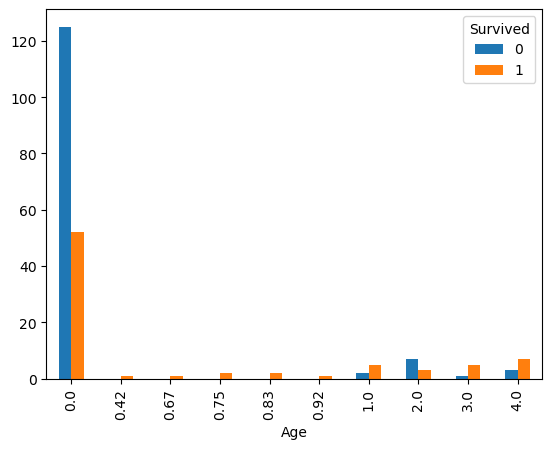

In [29]:
# graph

pd.crosstab(input_data['Age'], output_data).head(10).plot(kind='bar')

In [19]:
# training input and output

input_dataa_train, input_data_test, output_data_train, output_data_test = train_test_split(input_dataa, output_data, train_size=0.8)
model = DecisionTreeClassifier()
model.fit(input_dataa_train, output_data_train)
prediction = model.predict(input_data_test)

In [23]:
# accuracy

print('The accuracy is ',int((model.score(input_dataa_train, output_data_train))*100),'%')

The accuracy is  88 %
